# **How You Should Upload Your Data Videos?**

This note book performs EDA on Youtube videos data fetched using Google API. Here I focus on the effect of upload time and video duration on video's performance.

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Logo_of_YouTube_%282015-2017%29.svg/1280px-Logo_of_YouTube_%282015-2017%29.svg.png" width="800"/>
</div>


In [1]:
from utils.functions import get_data_youtue
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Get Data

In [2]:
# List of channel that you want to collect data.
handles = ["@DarshilParmar",
           "@seattledataguy",
           "@CodeWithYu",
           "@alexmerced-openlakehousead2617",
           "@eczachly_",
           "@kahandatasolutions",
           "@thedataengineeringshow",
           "@AlexTheAnalyst"
          ]

In [3]:
# This function returns 2 dataset, called channel_stats.csv and youtube_data.csv
# Fields included in youtube_data.csv: id, channelTitle, title, description, tags, viewCount, likeCount
# favoriteCount, commentCount, duration, definition, caption (video has close caption or not), publishedOn (day's name), datepublished, timepublished
# To advoid too many calls from API, comment the below line after you load the data to local folder
get_data_youtue(handles)

# Then load the data from local folder
channel_df = pd.read_csv('data/channel_stats.csv')
df = pd.read_csv('data/youtube_data.csv')

Getting video information from channel: Darshil Parmar
Getting video information from channel: Seattle Data Guy
Getting video information from channel: CodeWithYu
Getting video information from channel: Alex Merced - Open Lakehouse Advocate
Getting video information from channel: Data with Zach
Getting video information from channel: Kahan Data Solutions
Getting video information from channel: The Data Engineering Show - Podcast
Getting video information from channel: Alex The Analyst
Done!


In [4]:
df.head()

,id,channelTitle,title,description,tags,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,publishedOn,datepublished,timepublished
0,vG6zNUy_4Hw,Darshil Parmar,DON'T Get Left Behind! 2025 Data Engineering T...,Zero To Hero Data Engineering Pack: https://bi...,"darshil parmar, darshil parmar data engineer p...",13407.0,817.0,0.0,114.0,846.0,hd,True,Sunday,2024-10-27,15:07:20
1,FB4_y25Iifw,Darshil Parmar,Master Apache Airflow: 5 Real-World Projects t...,Get the Apache Airflow Course Here - https://...,"darshil parmar, Best Apache Airflow Course for...",11400.0,343.0,0.0,103.0,798.0,hd,True,Sunday,2024-08-25,14:00:12
2,hf2go3E2m8g,Darshil Parmar,Fundamentals Of Data Engineering Masterclass,Combo Package Python + SQL + Data warehouse (S...,"darshil parmar, fundamentals of data engineeri...",112966.0,4867.0,0.0,388.0,10946.0,hd,True,Sunday,2024-08-18,13:05:41
3,KIqteLTVLy8,Darshil Parmar,Building Your First Data Engineering Portfolio...,Check Out My Data Engineering Bootcamp: https:...,"darshil parmar, data engineering, data enginee...",24168.0,717.0,0.0,53.0,1385.0,hd,True,Sunday,2024-08-04,13:30:03
4,1rW89Sd6HYU,Darshil Parmar,Data Engineering Was Hard Until I Learned Thes...,➡️ Check Out My Data Engineering Bootcamp: htt...,"darshil parmar data engineer project, apache s...",48973.0,2353.0,0.0,101.0,463.0,hd,False,Monday,2024-07-08,15:44:34


## Explore Analysis

First let's look at channel's stats

In [5]:
# Get channel's stats
view_like_sum = df.groupby('channelTitle')[['viewCount', 'likeCount']].sum().reset_index()
merge_df = pd.merge(view_like_sum, channel_df, on='channelTitle').drop(columns= ['views','uploads'])
merge_df['Views per video ratio'] = round(merge_df['viewCount'] / merge_df['totalVideos'],2)
merge_df['Likes per view ratio']  = round(merge_df['likeCount'] / merge_df['viewCount'],4)

merge_df


,channelTitle,viewCount,likeCount,subscribers,totalVideos,Views per video ratio,Likes per view ratio
0,Alex Merced - Open Lakehouse Advocate,12949.0,150.0,154,19,681.53,0.0116
1,Alex The Analyst,41507295.0,1030625.0,899000,331,125399.68,0.0248
2,CodeWithYu,674034.0,17588.0,23000,69,9768.61,0.0261
3,Darshil Parmar,7637600.0,231232.0,157000,158,48339.24,0.0303
4,Data with Zach,1245397.0,44775.0,61000,51,24419.55,0.0360
5,Kahan Data Solutions,4314739.0,57286.0,43400,208,20743.94,0.0133
6,Seattle Data Guy,5422502.0,142673.0,102000,278,19505.40,0.0263
7,The Data Engineering Show - Podcast,70427.0,1480.0,3960,65,1083.49,0.0210


### **Question 1: When to upload?**

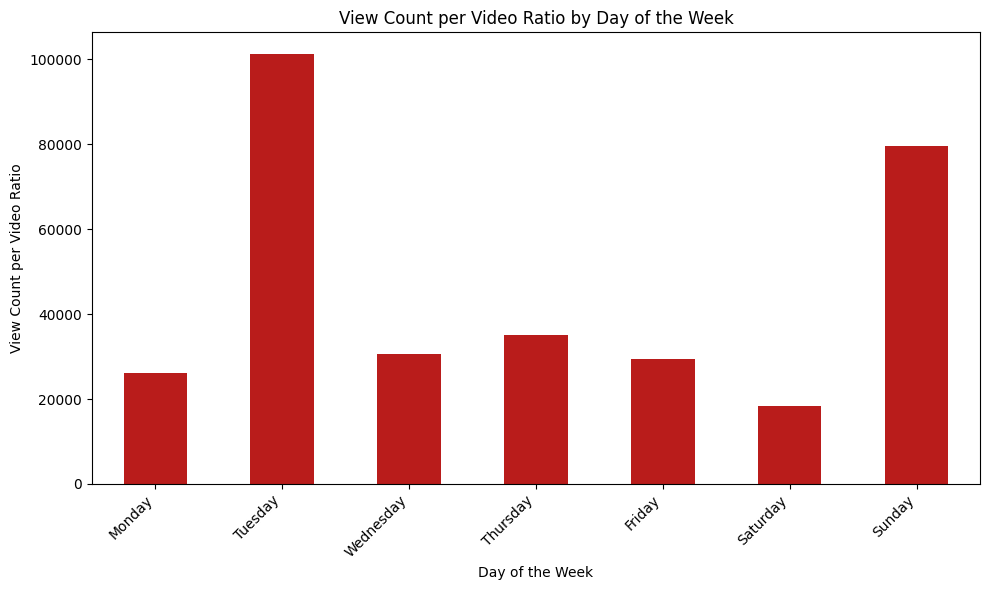

In [6]:
df_grouped = df.groupby(['publishedOn']).agg({'viewCount': 'sum', 'id': 'count'}).reset_index()

# Calculate the view count per video for each day
df_grouped['view_per_video_ratio'] = df_grouped['viewCount'] / df_grouped['id']

# Order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
view_counts_by_day = df_grouped.set_index('publishedOn').reindex(days_order)

# Plot the data
plt.figure(figsize=(10, 6))
view_counts_by_day['view_per_video_ratio'].plot(kind='bar', color='#b91c1b')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('View Count per Video Ratio')
plt.title('View Count per Video Ratio by Day of the Week')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Tuesday's view per video ratio is so high that it doesn't make much sense. Some assumptions can be made, such as that there are some channels that only upload on Tuesday, or that a channel with a high view per video ratio uploads its videos mostly on Tuesday.

In [7]:
tuesday_df = df[df['publishedOn'] == 'Tuesday']
tuesday_uploads = tuesday_df.groupby('channelTitle').size().reset_index(name='upload_count')
#most_tuesday_uploads = tuesday_uploads.loc[tuesday_uploads['upload_count'].idxmax()]
tuesday_uploads

,channelTitle,upload_count
0,Alex Merced - Open Lakehouse Advocate,5
1,Alex The Analyst,204
2,CodeWithYu,5
3,Darshil Parmar,6
4,Data with Zach,4
5,Kahan Data Solutions,16
6,Seattle Data Guy,52
7,The Data Engineering Show - Podcast,18


As the results show, Alex the Analyst uploads nearly two-thirds of their total videos on Tuesday, which makes Tuesday's view-per-video ratio so high. In this case, we need to look at each channel's stats to understand how they perform.

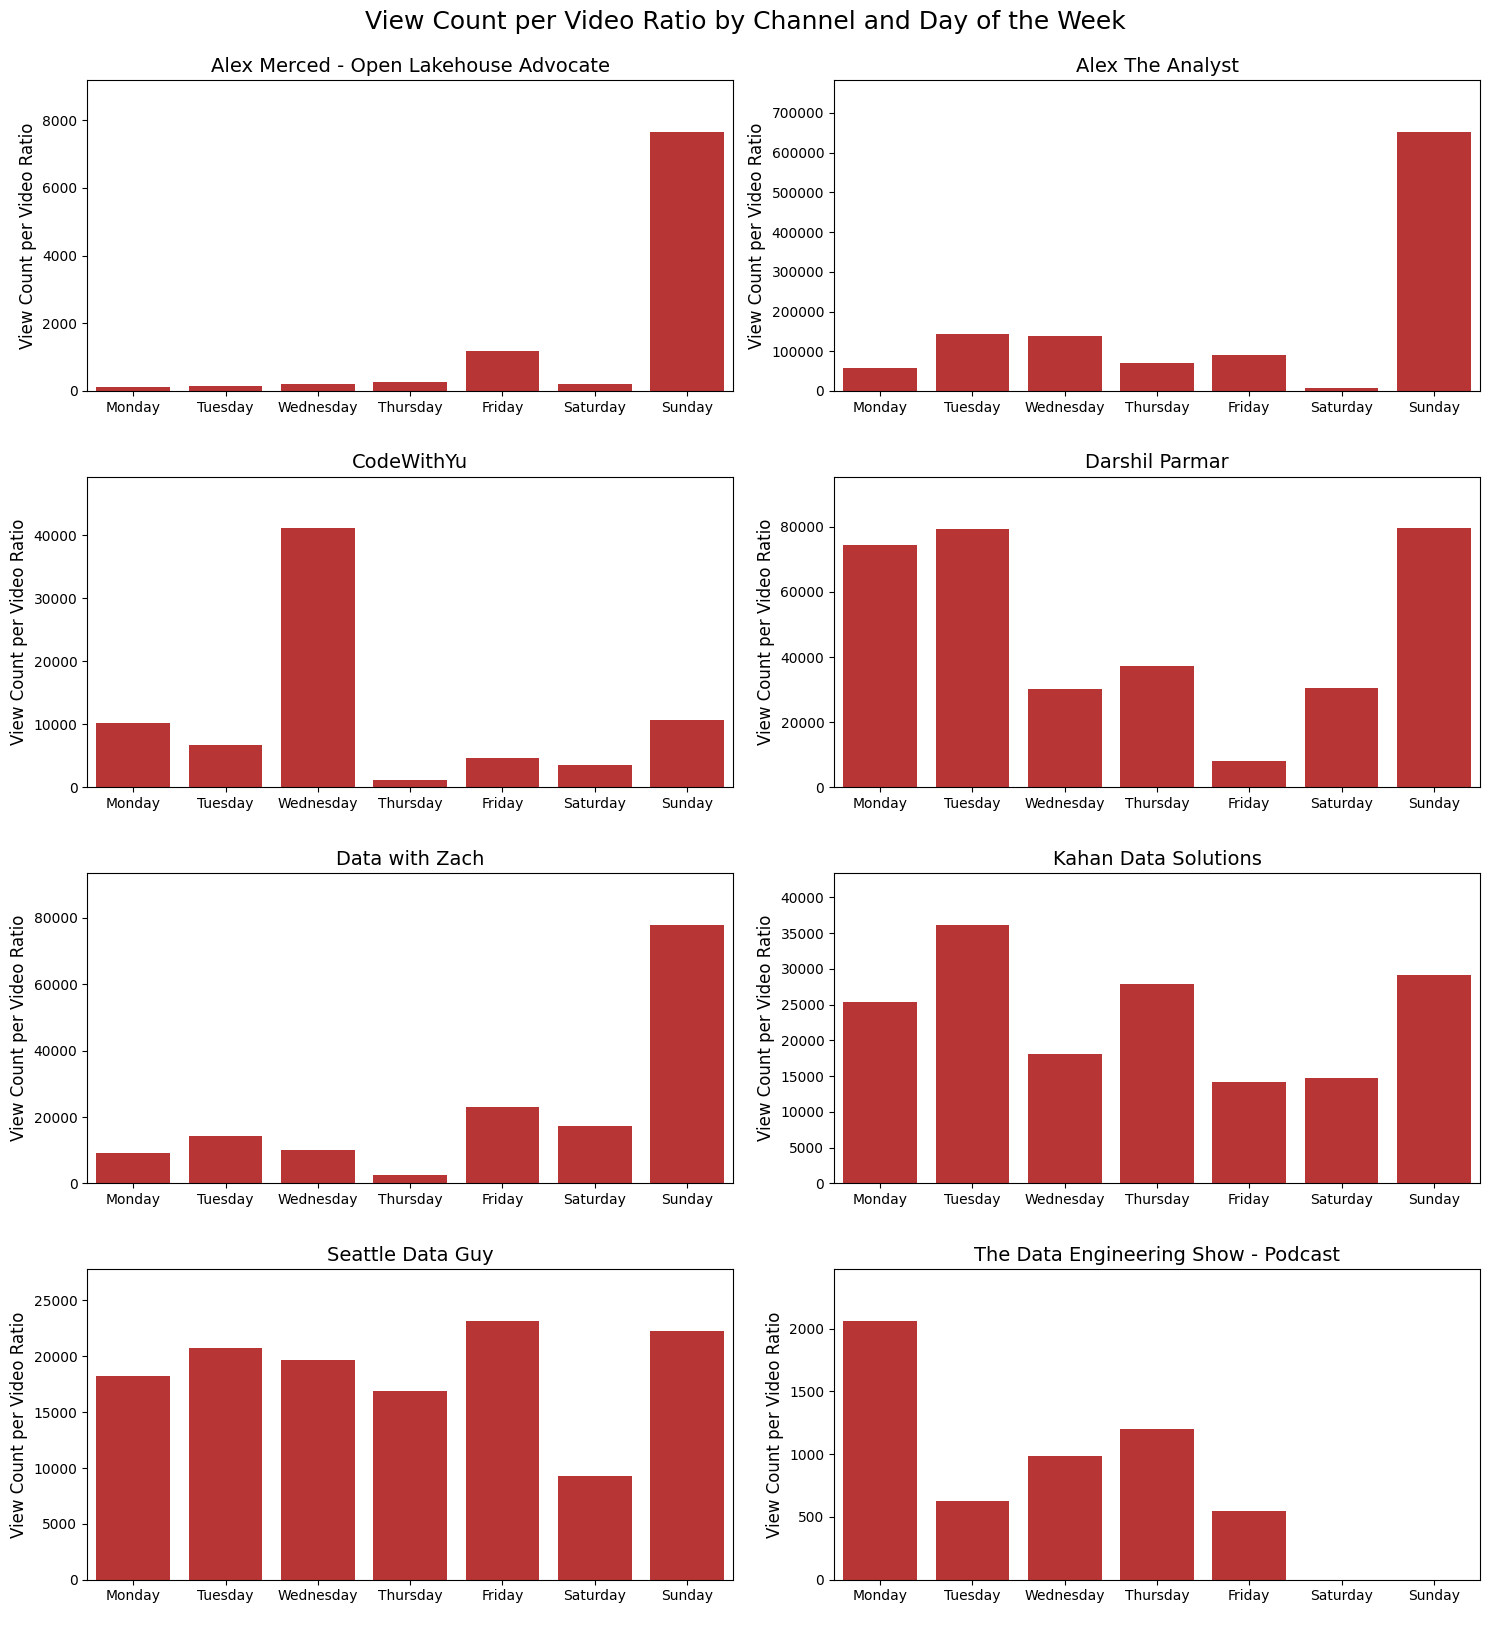

In [8]:
df_grouped = df.groupby(['channelTitle', 'publishedOn']).agg({'viewCount': 'sum', 'id': 'count'}).reset_index()
df_grouped['view_per_video_ratio'] = df_grouped['viewCount'] / df_grouped['id']

df_pivot = df_grouped.pivot(index='publishedOn', columns='channelTitle', values='view_per_video_ratio').fillna(0)

# Set up the number of channels and the number of rows and columns for the subplot
channels = df_pivot.columns
num_channels = len(channels)
ncols = 2
nrows = (num_channels + ncols - 1) // ncols  # Number of rows needed
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4), squeeze=False)
axes = axes.flatten()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the pivot table to match the days of the week
df_pivot = df_pivot.reindex(days_of_week)

for i, channel in enumerate(channels):
    sns.barplot(x=df_pivot.index, y=df_pivot[channel], ax=axes[i], color='#CD201F')
    axes[i].set_title(f'{channel}', fontsize=14)
    axes[i].set_xlabel(' ', fontsize=12)
    axes[i].set_ylabel('View Count per Video Ratio', fontsize=12)
    axes[i].set_ylim(0, df_pivot[channel].max() * 1.2)

# Hide any empty subplots if the number of channels is not a perfect square
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('View Count per Video Ratio by Channel and Day of the Week', fontsize=18, y=1.02)
plt.show()

#### **First question's answer**

Five out of seven channels perform best when their videos are uploaded on Sunday (The Data Engineering Show does not upload on Sunday, so it won't be counted). Even Alex the Analyst, who primarily uploads on Tuesday, has a significantly higher view-per-video ratio when videos are uploaded on Sunday. On the other hand, all channels share a common trend: videos uploaded on Saturday have the least views per video. So we might come to a conclusion that these channel should not upload on Saturday to maximine videos' performance.

### **Question 2: How long should the video be?**

To begin with, we will look at duration of these videos. As can be seen from the plot below, most video are under 30 minnutes. If a video is long, most likely it wil be around 1 hour.

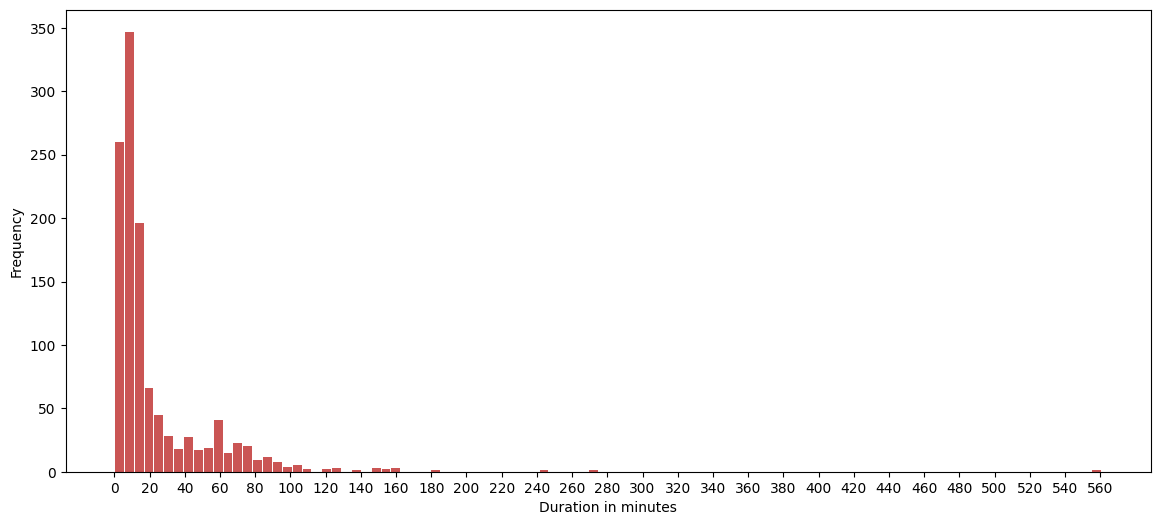

In [9]:
data = pd.DataFrame()
data['Duration in minutes'] = df['duration'] / 60

plt.figure(figsize=(14, 6))
sns.histplot(
    data, 
    x="Duration in minutes", 
    bins=100, 
    color='#b91c1b', 
    edgecolor=None, 
    shrink=0.9
)

plt.xticks(range(0, int(data['Duration in minutes'].max()) + 20, 20))
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.show()

There are videos with durations exceeding 200 minutes (4 hours) and even up to 500 minutes (9 hours), which is remarkably long. Let's identify these videos.

In [10]:
long_videos = df[df['duration'] > (120 * 60)].copy()
long_videos['durationMins'] = long_videos['duration'] / 60
long_videos = long_videos[['channelTitle', 'title', 'durationMins', 'viewCount', 'likeCount']]
long_videos.sort_values(by='durationMins', ascending=False, inplace=True)
long_videos.reset_index(drop=True, inplace=True)
long_videos

,channelTitle,title,durationMins,viewCount,likeCount
0,Seattle Data Guy,State Of Data Conference By Seattle Data Guy -...,560.966667,10418.0,301.0
1,Alex The Analyst,Analyst Builder Full Launch LiveStream | 20% O...,274.400000,11883.0,475.0
2,Alex The Analyst,Learn SQL Beginner to Advanced in Under 4 Hours,244.966667,69345.0,2931.0
3,Darshil Parmar,Fundamentals Of Data Engineering Masterclass,182.433333,112966.0,4867.0
4,CodeWithYu,Designing DataWarehouse from Scratch | End to ...,161.350000,16860.0,588.0
5,Alex The Analyst,"Learn Pandas in Under 3 Hours | Filtering, Joi...",160.116667,10337.0,485.0
6,Alex The Analyst,"Learn Excel in Under 3 Hours | Pivot Tables, L...",158.600000,10016.0,585.0
7,CodeWithYu,Decodable vs AWS Managed Service for Apache Fl...,153.716667,2017.0,82.0
8,Alex The Analyst,"Learn Python in Under 3 Hours | Variables, For...",152.016667,17451.0,752.0
9,CodeWithYu,End to End Realtime Streaming with Unstructure...,150.533333,15327.0,539.0


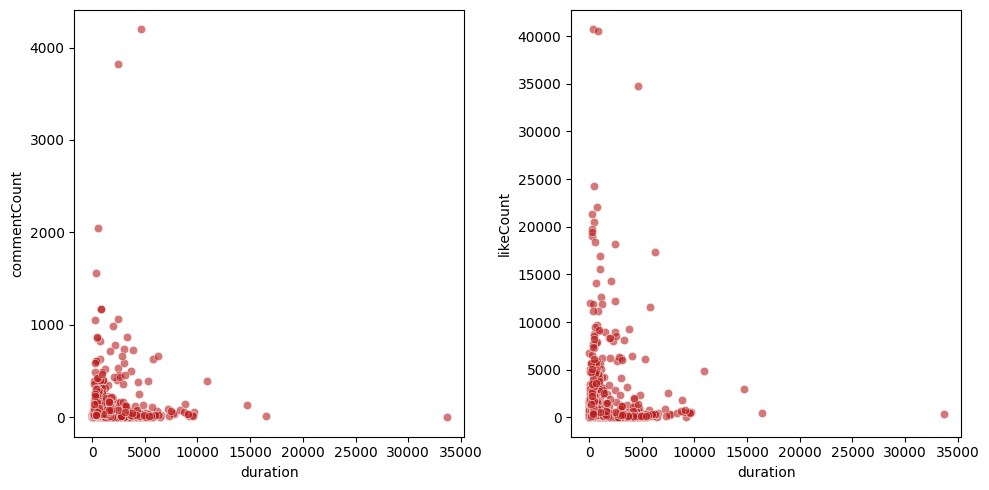

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(data=df, x="duration", y="commentCount", ax=ax[0], color='#b91c1b', alpha=0.6)
sns.scatterplot(data=df, x="duration", y="likeCount", ax=ax[1], color='#b91c1b', alpha=0.6)

plt.tight_layout()
plt.show()


Shorter video are likely to have more likes and video than long video.

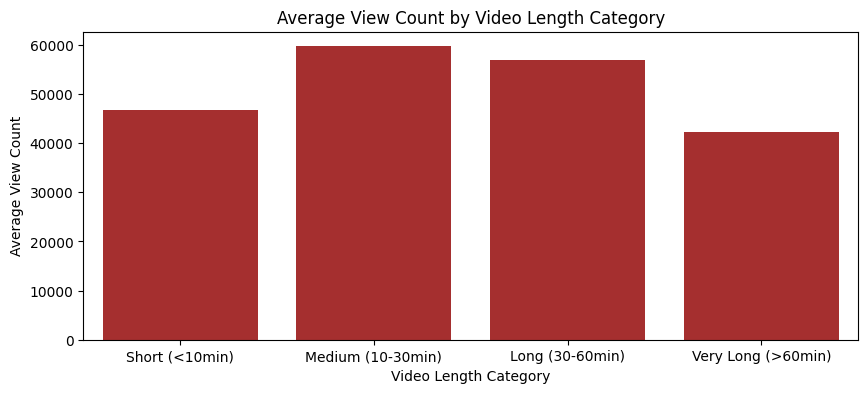

In [12]:
# Cut duration to short, medium, long and very long categories
bins = [0, 600, 1800, 3600, float('inf')]
labels = ['Short (<10min)', 'Medium (10-30min)', 'Long (30-60min)', 'Very Long (>60min)']
df['length_category'] = pd.cut(df['duration'], bins=bins, labels=labels)

# performance = df.groupby('length_category').agg({
#     'viewCount': 'mean',
#     'likeCount': 'mean',
#     'commentCount': 'mean'
# }).reset_index()

performance = df.groupby('length_category',observed=False)[['viewCount','likeCount', 'commentCount']].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=performance, x='length_category', y='viewCount', color='#b91c1b')
plt.title('Average View Count by Video Length Category')
plt.ylabel('Average View Count')
plt.xlabel('Video Length Category')
plt.show()


The plot shows that medium videos, with duration in 10 to 30 minutes span, perform the best. but long videos also get many views, this may due to the fact that many of thes long video are tutorial video which are usually longer then other video. 

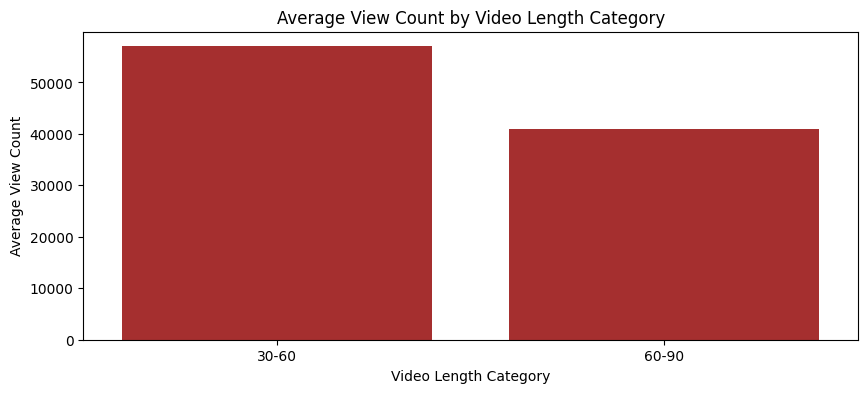

In [14]:
bins = [1800, 3600, 5400]
labels = ['30-60', '60-90']

# Create the length_category column
df['length_category'] = pd.cut(df['duration'], bins=bins, labels=labels, include_lowest=True, right=False)

performance = df.groupby('length_category',observed=False)[['viewCount','likeCount', 'commentCount']].mean().reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(data=performance, x='length_category', y='viewCount', color='#b91c1b')
plt.title('Average View Count by Video Length Category')
plt.ylabel('Average View Count')
plt.xlabel('Video Length Category')
plt.show()